In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
df = pd.read_csv('base_tratada.csv')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       999 non-null    int64  
 1   age                              999 non-null    int64  
 2   gender                           999 non-null    object 
 3   income                           999 non-null    int64  
 4   spending_score                   999 non-null    float64
 5   membership_years                 999 non-null    float64
 6   purchase_frequency               999 non-null    float64
 7   preferred_category               999 non-null    object 
 8   last_purchase_amount             999 non-null    float64
 9   income_qcut                      999 non-null    object 
 10  income_qcut_val                  999 non-null    object 
 11  income_level                     999 non-null    int64  
 12  spending_qcut         

In [20]:
pal = {
    'bronze': '#FF4136',
    'prata': '#B10DC9',
    'ouro': '#2ECC40'
}

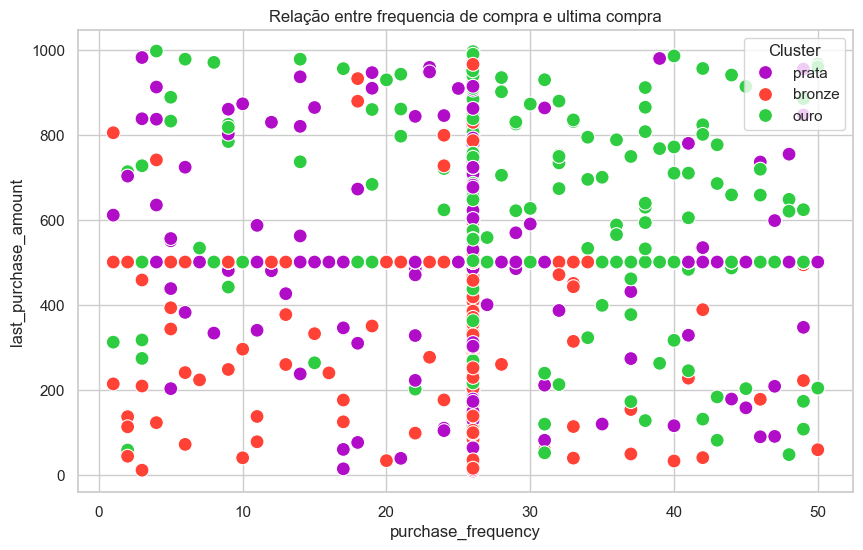

In [21]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.scatterplot(data=df, x='purchase_frequency', y='last_purchase_amount', hue='score_final_qcut', palette=pal, s=100)

# Definir rótulos e título
plt.xlabel("purchase_frequency")
plt.ylabel("last_purchase_amount")
plt.title("Relação entre frequencia de compra e ultima compra")

# Exibir o gráfico com legenda
plt.legend(title="Cluster")
plt.show()

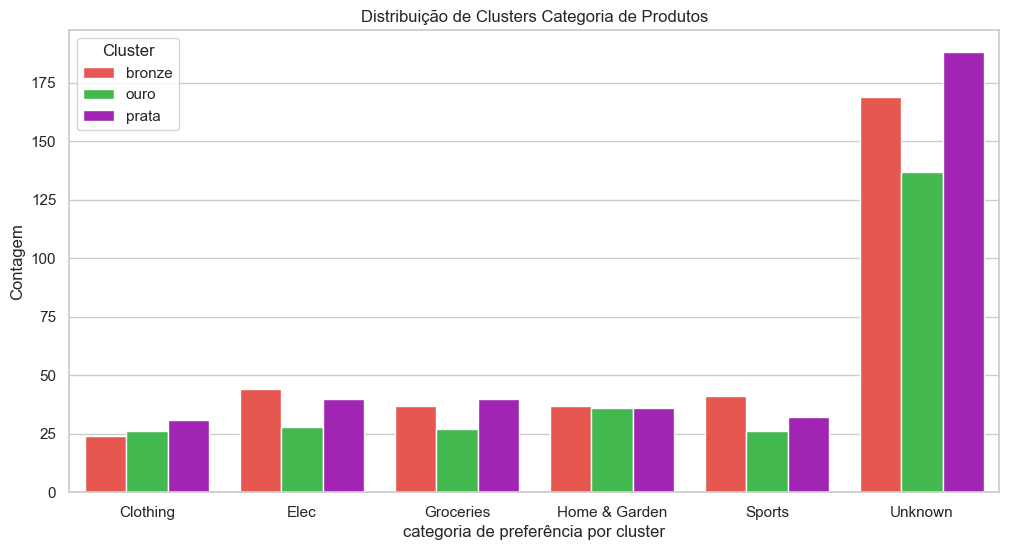

In [22]:

sns.set(style="whitegrid")

cluster_counts = df.groupby(['preferred_category', 'score_final_qcut']).size().unstack(fill_value=0)


cluster_counts_melted = cluster_counts.reset_index().melt(id_vars=['preferred_category'], var_name='score_final_qcut', value_name='Contagem')

plt.figure(figsize=(12, 6))
sns.barplot(data=cluster_counts_melted, x='preferred_category', y='Contagem', hue='score_final_qcut', palette=pal)

plt.xlabel("categoria de preferência por cluster")
plt.ylabel("Contagem")
plt.title("Distribuição de Clusters Categoria de Produtos")


plt.legend(title="Cluster")
plt.show()

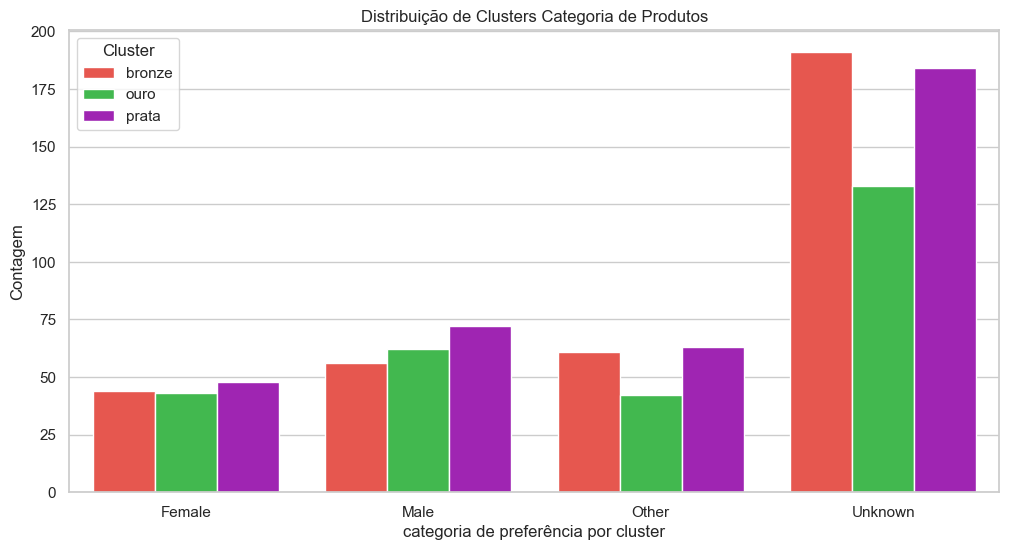

In [23]:
sns.set(style="whitegrid")

cluster_counts = df.groupby(['gender', 'score_final_qcut']).size().unstack(fill_value=0)


cluster_counts_melted = cluster_counts.reset_index().melt(id_vars=['gender'], var_name='score_final_qcut', value_name='Contagem')

plt.figure(figsize=(12, 6))
sns.barplot(data=cluster_counts_melted, x='gender', y='Contagem', hue='score_final_qcut', palette=pal)

plt.xlabel("categoria de preferência por cluster")
plt.ylabel("Contagem")
plt.title("Distribuição de Clusters Categoria de Produtos")


plt.legend(title="Cluster")
plt.show()

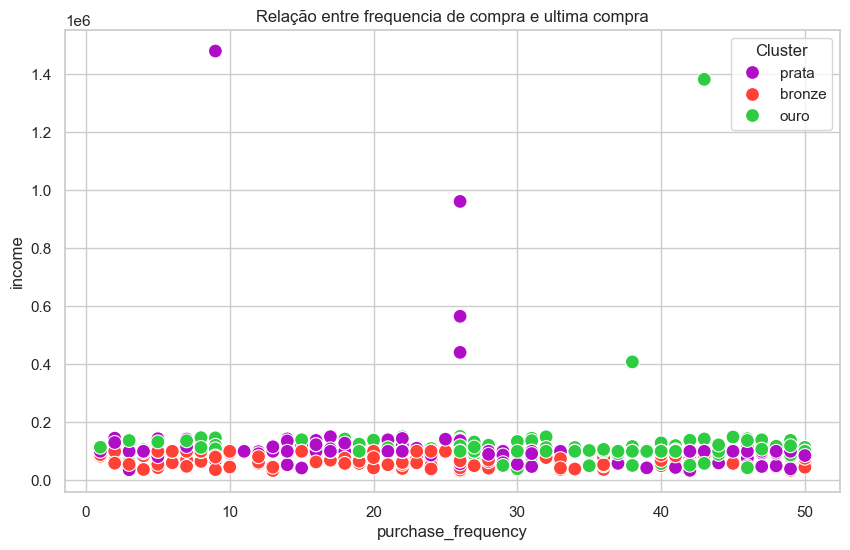

In [25]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.scatterplot(data=df, x='purchase_frequency', y='income', hue='score_final_qcut', palette=pal, s=100)

# Definir rótulos e título
plt.xlabel("purchase_frequency")
plt.ylabel("income")
plt.title("Relação entre frequencia de compra e ultima compra")

# Exibir o gráfico com legenda
plt.legend(title="Cluster")
plt.show()

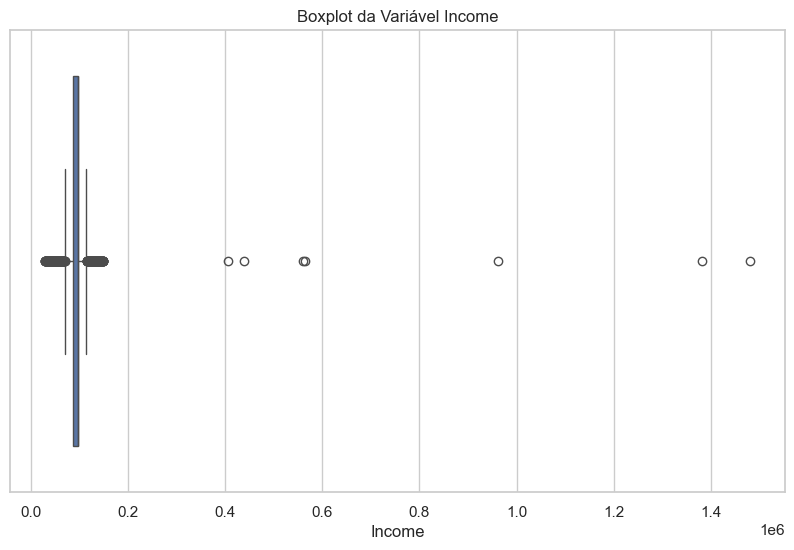

In [26]:
# Configurar o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Criar um boxplot para a variável 'income'
sns.boxplot(x=df['income'])

# Adicionar título e rótulos aos eixos
plt.title('Boxplot da Variável Income')
plt.xlabel('Income')

# Mostrar o gráfico
plt.show()

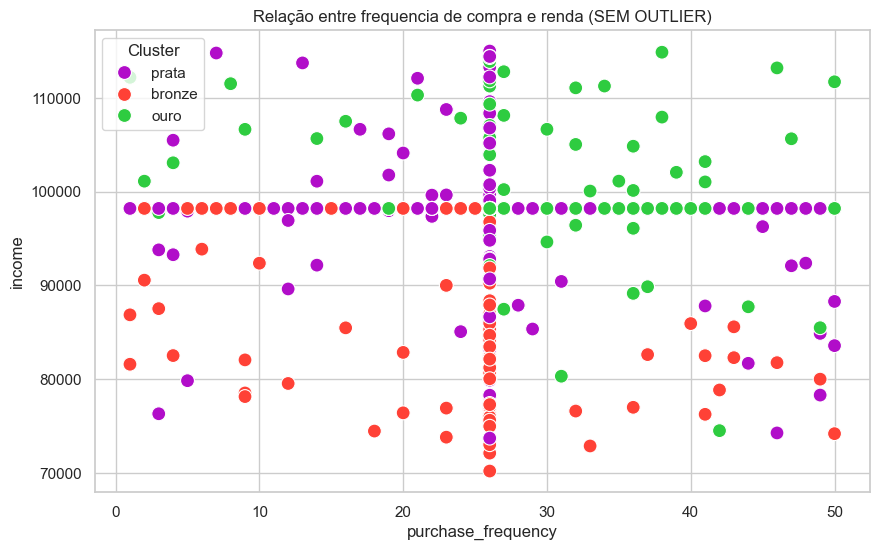

In [30]:
Q1 = df['income'].quantile(0.25)
Q3 = df['income'].quantile(0.75)

# Calcular o IQR (Interquartile Range)
IQR = Q3 - Q1

# Determinar os limites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar os dados para excluir temporariamente os outliers
df_sem_outliers = df[(df['income'] >= limite_inferior) & (df['income'] <= limite_superior)]


plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.scatterplot(data=df[(df['income'] >= limite_inferior) & (df['income'] <= limite_superior)], x='purchase_frequency', y='income', hue='score_final_qcut', palette=pal, s=100)

# Definir rótulos e título
plt.xlabel("purchase_frequency")
plt.ylabel("income")
plt.title("Relação entre frequencia de compra e renda (SEM OUTLIER)")

# Exibir o gráfico com legenda
plt.legend(title="Cluster")
plt.show()